# CVL609 (Civil Engineering Systems) Tutorial - Week 2 

#### Note: You can access the colab version of this notebook [here](https://colab.research.google.com/github/amirkfard/CVL609/blob/main/LinearProgramming.ipynb) .

In this tutorial, you will learn how to use Google OR-Tools python library to model and solve linear programming optimization problems.
The following explanations are adopted from OR-Tools website (https://developers.google.com/optimization).



## Linear Optimization
Linear optimization (or *linear programming*) is the name given to computing the best solution to a problem modeled as a set of linear relationships. These problems arise in many scientific and engineering disciplines. (The word "programming" is a bit of a misnomer, similar to how "computer" once meant "a person who computes." Here, "programming" refers to the arrangement of a plan, rather than programming in a computer language.)

## Install OR-Tools for Python
The fastest way to get OR-Tools is to install the Python binary version. If you already have Python (version 3.6+ on Linux, Mac OS or Windows), and the Python package manager PIP, you can install OR-Tools as follows:

In [ ]:
pip install --upgrade --user ortools

## Required Steps for Solving an LP Problem with OR-Tools ([ref.](https://developers.google.com/optimization/lp/lp_example))
The following sections present an example of an LP problem and show how to solve it. Here's the problem:

__Maximize $3x + 4y$__ subject to the following constraints:

$x + 2y	≤	14$

$3x – y	≥	0$

$x – y	≤	2$

Both the objective function, $3x + 4y$, and the constraints are given by linear expressions, which makes this a linear problem.

The constraints define the feasible region, which is the triangle shown below, including its interior.

<img src="https://developers.google.com/optimization/images/lp/feasible_region.png" width="600">

### Basic steps for solving an LP problem

To solve a LP problem, your program should include the following steps:

1. Import the linear solver wrapper,
2. declare the LP solver,
3. define the variables,
4. define the constraints,
5. define the objective,
6. call the LP solver; and
7. display the solution


#### 1. Import the linear solver wrapper
Import (or include) the OR-Tools linear solver wrapper, an interface for MIP solvers and linear solvers, as shown below.


In [57]:
from ortools.linear_solver import pywraplp

#### 2. Declare the LP solver
`MPsolver` is a wrapper for several different solvers, including Glop. The code below declares the GLOP solver.


In [58]:
solver = pywraplp.Solver.CreateSolver('GLOP')

#### 3. Create the variables
First, create variables x and y whose values are in the range from 0 to infinity.

In [59]:
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

print('Number of variables =', solver.NumVariables())

Number of variables = 2


#### 4. Define the constraints
Next, define the constraints on the variables. Give each constraint a unique name (such as constraint0), and then define the coefficients for the constraint.

In [60]:
# Constraint 0: x + 2y <= 14.
solver.Add(x + 2 * y <= 14.0)

# Constraint 1: 3x - y >= 0.
solver.Add(3 * x - y >= 0.0)

# Constraint 2: x - y <= 2.
solver.Add(x - y <= 2.0)

print('Number of constraints =', solver.NumConstraints())

Number of constraints = 3


#### 5. Define the objective function
The following code defines the objective function, $3x + 4y$, and specifies that this is a maximization problem.


In [61]:
# Objective function: 3x + 4y.
solver.Maximize(3 * x + 4 * y)

#### 6. Call the solver
The following code invokes the solver.


In [62]:
status = solver.Solve()

#### 7. Display the solution
The following code displays the solution.


In [63]:
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 33.99999999999999
x = 5.999999999999998
y = 3.9999999999999996




Here is a graph showing the solution:

The dashed green line is defined by setting the objective function equal to its optimal value of 34. Any line whose equation has the form 3x + 4y = c is parallel to the dashed line, and 34 is the largest value of c for which the line intersects the feasible region.
<img src="https://developers.google.com/optimization/images/lp/feasible_region_solution.png" width="600">




#### The complete code
The complete programs are shown below.


In [64]:

def LinearProgrammingExample():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(x + 2 * y <= 14.0)

    # Constraint 1: 3x - y >= 0.
    solver.Add(3 * x - y >= 0.0)

    # Constraint 2: x - y <= 2.
    solver.Add(x - y <= 2.0)

    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(3 * x + 4 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


LinearProgrammingExample()

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 33.99999999999999
x = 5.999999999999998
y = 3.9999999999999996

Advanced usage:
Problem solved in 0.000000 milliseconds
Problem solved in 2 iterations


## Example 2 - Water Source

<img src="img/2_problem.webp" width="800">
<img src="img/2_table.webp" width="600">
<img src="img/2_model.webp" width="800">

In [65]:
from ortools.linear_solver import pywraplp

def WaterSourceExample():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample1.
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create the three variables and define their bounds.
    x1 = solver.NumVar(0, 25.5, 'x1')
    x2 = solver.NumVar(0, 120.0, 'x2')
    x3 = solver.NumVar(0, 100.0, 'x3')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x1 + x2 + x3 >= 150.0.
    solver.Add(x1 + x2 + x3 >= 150.0)

    # Constraint 1: 200x1 + 2300x2 + 700x3 <= 1200*150.
    solver.Add(200*x1 + 2300*x2 + 700*x3 <= 180000.0)


    print('Number of constraints =', solver.NumConstraints())

    # Objective function: Min 500 x1 + 1000 x2 + 2000 x3.
    solver.Minimize(500 * x1 + 1000 * x2 + 2000 * x3)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x1 =', x1.solution_value())
        print('x2 =', x2.solution_value())
        print('x3 =', x3.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


WaterSourceExample()

Number of variables = 3
Number of constraints = 2
Solution:
Objective value = 206906.25
x1 = 25.5
x2 = 54.84375
x3 = 69.65625

Advanced usage:
Problem solved in 0.000000 milliseconds
Problem solved in 0 iterations


## Example 3 - Wastewater treatment efficiency

<img src="img/3_fig.webp" width="800">
<img src="img/3_problem1.webp" width="800">
<img src="img/3_problem2.webp" width="800">
<img src="img/3_model.webp" width="800">

In [66]:
from ortools.linear_solver import pywraplp

def WastewaterExample():
    """Linear programming sample."""
    # Instantiate a Glop solver.
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create the two variables and define their bounds.
    x1 = solver.NumVar(50.0, solver.infinity(), 'e1')
    x2 = solver.NumVar(35.0, solver.infinity(), 'e2')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x1 + x2 >= 100.
    solver.Add(x1 + x2 >= 100.0)


    print('Number of constraints =', solver.NumConstraints())

    # Objective function: Min 20000 x1 + 10000 x2.
    solver.Minimize(20000.0 * x1 + 10000.0 * x2)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('e1 =', x1.solution_value())
        print('e2 =', x2.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


WastewaterExample()

Number of variables = 2
Number of constraints = 1
Solution:
Objective value = 1500000.0
e1 = 50.0
e2 = 50.0

Advanced usage:
Problem solved in 0.000000 milliseconds
Problem solved in 0 iterations


## Example 4 - Ore Production

<img src="img/4_problem.webp" width="800">
<img src="img/4_table.webp" width="600">
<img src="img/4_model.webp" width="800">

In [67]:
from ortools.linear_solver import pywraplp

def OreProductionExample():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create the two variables and define their bounds.
    x = solver.NumVar(0, 5.0, 'x')
    y = solver.NumVar(0, 5.0, 'y')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: 6 x + y >= 12.
    solver.Add(6 * x + y >= 12.0)

    # Constraint 1: 3 x + y >= 8.
    solver.Add(3 * x + y >= 8.0)

    # Constraint 2: 4 x + 6 y >= 24.
    solver.Add(4 * x + 6 * y >= 24.0)

    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 180 x + 160 y.
    solver.Minimize(180 * x + 160 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


OreProductionExample()

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 765.7142857142858
x = 1.714285714285714
y = 2.8571428571428577

Advanced usage:
Problem solved in 0.000000 milliseconds
Problem solved in 2 iterations


### Graphical Solution

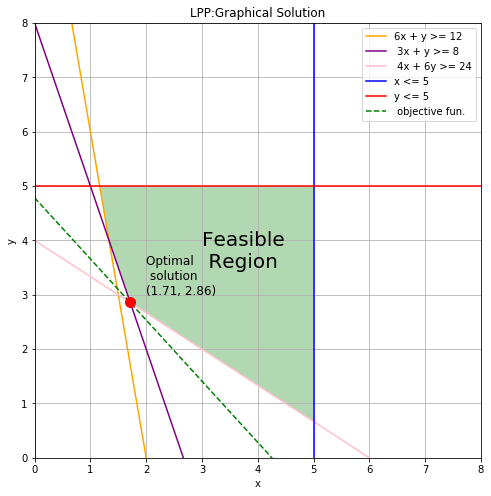

In [68]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 7)
plt.figure(figsize=(8,8))
plt.plot(x, 12.0 - 6.0*x, color = 'orange', label = '6x + y >= 12')
plt.plot(x, 8.0 - 3*x, color = 'purple', label= ' 3x + y >= 8')
plt.plot(x, 4.0 - (4/6)*x, color = 'pink', label= ' 4x + 6y >= 24')
plt.axvline(x = 5, color = 'blue',label = 'x <= 5')
plt.axhline(y = 5, color = 'red',label = 'y <= 5')
plt.plot(x, 4.784 - 1.125*x, color = 'green',linestyle = '--' , label= ' objective fun.')
plt.plot(12/7, 20/7, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.xlim([0, 8])
plt.ylim([0, 8])

# Define the boundaries of the feasible area in the plot
x = [12/7, 4/3, 7/6, 5, 5]
y = [20/7, 4, 5, 5, 4/6]
plt.fill(x, y, 'green' , alpha = 0.3)

plt.text(3, 3.5, 'Feasible \n Region', size = '20')
plt.annotate('Optimal \n solution\n(1.71, 2.86)', xy = (2, 3), size = '12')

plt.xlabel("x")
plt.ylabel("y")
plt.title('LPP:Graphical Solution')
plt.grid(True)
plt.legend()
plt.show()

In [69]:
1.125*1.71 + 2.86

4.7837499999999995

## Example 5

<img src="img/lp_5_problem.webp" width="800">

In [70]:
from ortools.linear_solver import pywraplp

def Example5():
    """Linear programming sample."""
    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('GLOP')

    # Create the two variables and let them take on any non-negative value.
    x1 = solver.NumVar(0.0, 8.0, 'x1')
    x2 = solver.NumVar(0.0, 6.0, 'x2')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(2.0 * x1 + 4.0 * x2 <= 28.0)
    solver.Add(5.0 * x1 + 5.0 * x2 <= 50.0)


    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(140.0 * x1 + 160.0 * x2)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x1 =', x1.solution_value())
        print('x2 =', x2.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())


Example5()

Number of variables = 2
Number of constraints = 2
Solution:
Objective value = 1480.0
x1 = 6.000000000000002
x2 = 3.9999999999999996

Advanced usage:
Problem solved in 0.000000 milliseconds
Problem solved in 3 iterations


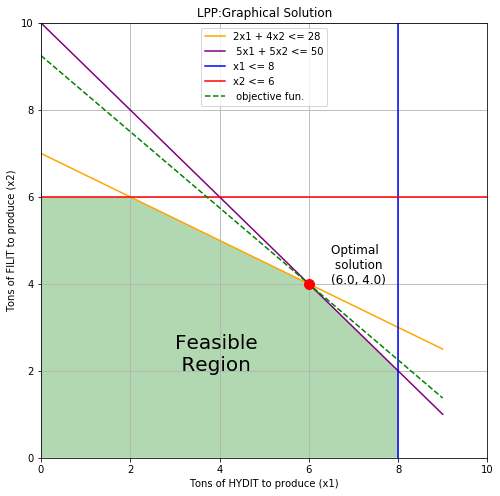

In [71]:
# Plot the optimal solution
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10)
plt.figure(figsize=(8,8))
plt.plot(x, 7.0 - 0.5*x, color = 'orange', label = '2x1 + 4x2 <= 28')
plt.plot(x, 10 - x, color = 'purple', label= ' 5x1 + 5x2 <= 50')
plt.axvline(x = 8, color = 'blue',label = 'x1 <= 8')
plt.axhline(y = 6, color = 'red',label = 'x2 <= 6')
plt.plot(x, 9.25 - 0.875*x, color = 'green',linestyle = '--'  , label= ' objective fun.')
plt.plot(6, 4, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.xlim([0, 10])
plt.ylim([0, 10])

# Define the boundaries of the feasible area in the plot
x = [0, 0, 2, 6, 8, 8]
y = [0, 6, 6, 4, 2, 0]
plt.fill(x, y, 'green' , alpha = 0.3)

plt.text(3, 2, 'Feasible \n Region', size = '20')
plt.annotate('Optimal \n solution\n(6.0, 4.0)', xy = (6.5, 4.0), size = '12')

plt.xlabel("Tons of HYDIT to produce (x1)")
plt.ylabel("Tons of FILIT to produce (x2)")
plt.title('LPP:Graphical Solution')
plt.grid(True)
plt.legend()
plt.show()